In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix


In [25]:
df = pd.read_csv('smsspamcollection/SMSSpamCollection', delimiter='\t', header=None)
df = df.rename(columns={0:'y',1:'x'})

In [33]:
df.x = df.x.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       5572 non-null   object
 1   x       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [34]:
y = df.y
X = df.x

In [35]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 )

In [36]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [45]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
for i, prediction in enumerate(predictions[:5]):
    print ('Prediction: %s. Message: %s' % (prediction, X_test_raw.iloc[i]))

Prediction: ham. Message: Squeeeeeze!! This is christmas hug.. If u lik my frndshp den hug me back.. If u get 3 u r cute:) 6 u r luvd:* 9 u r so lucky;) None? People hate u:
Prediction: ham. Message: And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed
Prediction: ham. Message: Mmm thats better now i got a roast down me! id b better if i had a few drinks down me 2! Good indian?
Prediction: ham. Message: Mm have some kanji dont eat anything heavy ok
Prediction: ham. Message: So there's a ring that comes with the guys costumes. It's there so they can gift their future yowifes. Hint hint


In [46]:
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print (  np.mean(scores), scores  )

0.9484615384615385 [0.9525641  0.96282051 0.93589744 0.9525641  0.93846154]


In [61]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])
parms = {
    'vect__max_df': (0.25, 0.5, 0.75),
    'vect__stop_words': ('english', None),
    'vect__max_features': (2500, 5000, 10000, None),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'vect__norm': ('l1', 'l2'),
    'clf__penalty': ('l1', 'l2'),
    'clf__C': (0.01, 0.1, 1, 10),
}


grid_search = GridSearchCV(  pipeline
                           , parms
                           , n_jobs=-1
                           , verbose=1
                           , scoring='accuracy', cv=3)

X_train, X_test, y_train, y_test = train_test_split(X, y)
grid_search.fit(X_train, y_train)
print ('Best score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))
    predictions = grid_search.predict(X_test)
    print ('Accuracy:', accuracy_score(y_test, predictions)) 
    

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


C:\Users\Tim\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.98109596 0.98420675 0.98420675]
  warnings.warn(


Best score: 0.986
Best parameters set:
	clf__C: 10
Accuracy: 0.9813352476669059
	clf__penalty: 'l2'
Accuracy: 0.9813352476669059
	vect__max_df: 0.25
Accuracy: 0.9813352476669059
	vect__max_features: 10000
Accuracy: 0.9813352476669059
	vect__ngram_range: (1, 2)
Accuracy: 0.9813352476669059
	vect__norm: 'l2'
Accuracy: 0.9813352476669059
	vect__stop_words: None
Accuracy: 0.9813352476669059
	vect__use_idf: True
Accuracy: 0.9813352476669059


NameError: name 'parameters' is not defined

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

[[4 1]
 [2 3]]


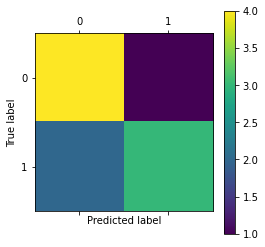

In [43]:
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)
plt.matshow(confusion_matrix) 
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [44]:
y_pred, y_true = [0, 1, 1, 0], [1, 1, 1, 1]
print ('Accuracy:', accuracy_score(y_true, y_pred))

Accuracy: 0.5
